# Lab: Credit Card Fraud Detection by Using Machine Learning

- 제조 공정에 이상 유무 또는 제조 제품의 불량 여부를 판단하는 문제는 주로 극단적인 클래스 불균형이 있는 이상치 탐지 문제입니다.

- 여기서는 극단적인 클래스 불균형을 가지고 있는 데이터 셋을 사용하여 이상치 탐지에 대한 기본적인 지도학습 방법을 확인해보겠습니다.

- 먼저 사용할 데이터를 둘러봅시다.



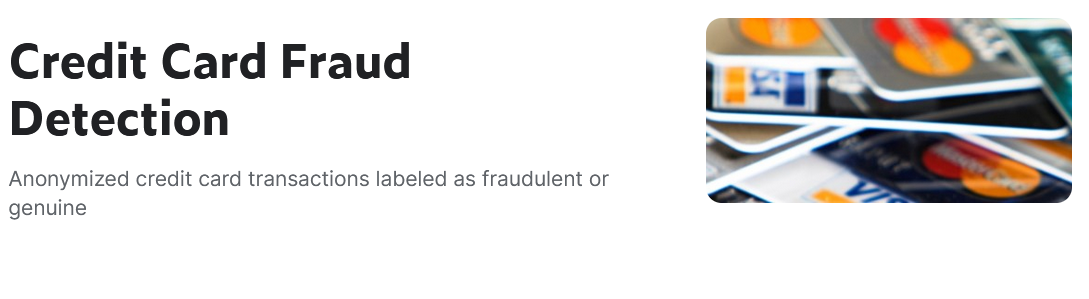

- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

- 신용 카드 회사가 신용 카드 사기 거래를 인식하여 고객이 구매하지 않은 품목에 대한 요금이 청구되지 않도록 하는 것이 중요합니다.

- 이 데이터 세트에는 2013년 9월에 유럽 카드 소지자가 신용카드로 결제한 거래가 포함되어 있습니다.

- 이 데이터 세트에는 총 284,807건의 거래 중 492건의 사기가 발생했습니다. 양성 클래스(사기)가 전체 거래의 0.172%를 차지합니다.

- 이 데이터 세트에는 PCA라는 알고리즘으로 전처리를 한 숫자 입력 변수만 포함되어 있습니다. 안타깝게도 기밀 유지 문제로 인해 데이터에 대한 원래 특징과 더 많은 배경 정보는 제공할 수 없습니다.

- 특징 V1, V2, ... V28은 변환으로 얻은 주요 구성 요소이며, 변환되지 않은 유일한 특징은 '시간'Time과 '금액'Amount입니다.

- 특징 'Class'는 응답 변수이며, 사기가 발생하면 1, 그렇지 않으면 0의 값을 갖습니다.



## Lab 과정

- 두번의 실습을 바탕으로 다음 순서로 예측 모델을 수립해가도록 하겠습니다.

1. **Data Reading:** 데이터를 불러오고 Dataframe 구조를 확인합니다.


2. **Data Cleaning:** 빈 값을 확인하고 처리합니다.

3. **Data Visualization:**  타겟 변수에 대한 분포를 확인합니다.

4. **Preprocessing**: 데이터를 학습, 검증세트로 나누고 수치형 데이터에 대한 정규화를 수행합니다.

5. **Model Training:** 실행 가능한 분류 모델을 사용하여 학습을 수행합니다.

6. **Evaluation and Prediction:** 학습된 모델을 바탕으로 평가 및 예측 수행

- 주석과 가이드를 따라 빈칸을 적절히 완성하도록 하세요.

- 지금부터 시작해보도록 하겠습니다!

## Data Reading

- 관련 모듈을 임포트하고 데이터 파일을 다운로드 합니다.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# !pip install --upgrade gdown
!gdown 1VaS_Vvw-Pz7X9Qu_TF4SGlTBFT8FLGWS

Downloading...
From (original): https://drive.google.com/uc?id=1VaS_Vvw-Pz7X9Qu_TF4SGlTBFT8FLGWS
From (redirected): https://drive.google.com/uc?id=1VaS_Vvw-Pz7X9Qu_TF4SGlTBFT8FLGWS&confirm=t&uuid=a8a34f66-f670-470d-b3a6-16a2fbc5ae6a
To: /content/creditcard.csv
100% 151M/151M [00:00<00:00, 168MB/s]


- **[연습 1]** pandas를 이용하여 데이터 파일을 데이터 프레임으로 로딩하세요.

In [148]:
df = pd.read_csv("creditcard.csv")

- **[연습 2]** 만들어진 데이터 프레임에서 5개 행을 확인하세요.

In [149]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- **[연습 3]** DataFrame의 행과 열의 개수를 출력하세요.

In [150]:
df.shape

(284807, 31)

## Data Cleaning

- **[연습 4]** 컬럼 별로 빈값의 개수를 구하세요.

- hint: `isnull()`

In [151]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- **[연습 4]** `Class` 컬럼이 어떤 값을 몇개나 가지고 있는지 확인하세요.

- hint: `value_counts()`

In [152]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Data Visualization

- **[연습 5]**  `Class` 컬럼을 사용하여 `countplot`을 그려봅시다.

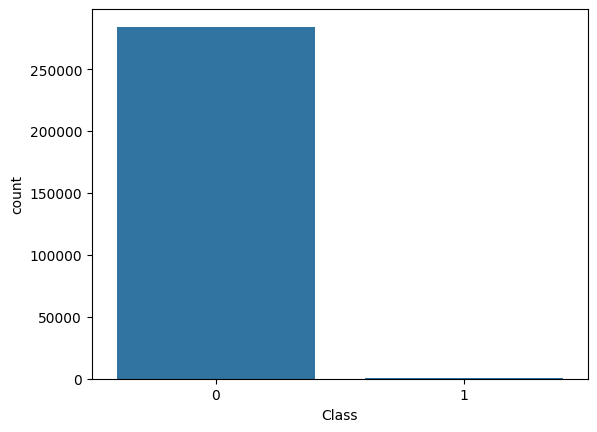

In [153]:
sns.countplot(data = df, x = 'Class')
plt.show()

- 그림에서 확인할 수 있듯이 정상 데이터가 압도적으로 많은 것을 확인할 수 있습니다.

- 이렇게 균형이 맞지 않는 샘플을 가지는 것은 제조 데이터의 두드러진 특징이라고 할 수 있습니다. 이런 데이터에 대한 예측 평가를 제대로 하기 위해서는 `accuracy`만으로는 부족합니다.

- 추가적으로 다음 셀을 실행하여 추가적인 매트릭을 임포트 합니다.

In [154]:
from sklearn.metrics import confusion_matrix, classification_report

## Preprocessing

- **[연습 6]** `df`에서  `Class` 컬럼을 `all_targets`, 나머지 컬럼을 `all_features`에 나눠 담으세요.

- hint: `df.drop([col1, col2, ...], axis=1)`

In [155]:
all_features = df.drop(columns = 'Class')
all_targets = df['Class']

In [156]:
display(all_features.head(), all_targets.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

- **[연습 7]** `all_targets`, `all_features`를 numpy 어레이로 변경하세요. `all_features`는 `float32`형으로 `all_targets`는 `uint8`형으로 지정하세요.

- hint: `df.astype(np.float32)`, `df.astype(np.unit8)`, `df.to_numpy()`

In [157]:
features = np.array(all_features.astype(np.float32))
targets = np.array(all_targets.astype(np.uint8)) # uint8 : 부호없는 int

print("features.shape:", features.shape)
print("targets.shape:", targets.shape)
print("features.type:", type(features))
print("features.type:", type(targets))

features.shape: (284807, 30)
targets.shape: (284807,)
features.type: <class 'numpy.ndarray'>
features.type: <class 'numpy.ndarray'>


- **[연습 8]** 데이터의 20%를 검증 데이터로 분리하세요.

- `sklearn`의 `train_test_split`을 쓰지말고 numpy의 슬라이싱 기능을 활용하세요.

In [158]:
num_val_samples = int(len(features) * 0.2)

# 위에서 계산한 num_val_samples를 이용해서 train, val을 slicing하세요.
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]

val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

print("Number of training samples:", len(train_features))
print("Number of validation samples:", len(val_features))

Number of training samples: 227846
Number of validation samples: 56961


### 클래스 가중치Class Weight

- 이 실습에서는 타겟 클래스가 극단적으로 불균형한 데이터 셋을 다루고 있습니다.

- 일부 머신러닝 모델에서는 이런 데이터 셋을 좀 더 잘 적합 시키기 위해 클래스에 대한 가중치를 설정할 수 있습니다.

- `np.bincount()`를 사용하여 0번, 1번 클래스의 갯수를 구해 다음처럼 간단하게 클래스의 가중치를 구할 수 있습니다.

$$
w_n = \frac{\text{# of class_n}}{\text{# of samples}}
$$

- 클래스의 가중치는 샘플이 작은 쪽 클래스가 크게 설정되고 이 가중치를 모델 손실함수에 반영하여 가중치가 높은 클래스의 샘플을 틀리면 손실이 훨씬 커지게 패널티를 부여하게 됩니다.

In [159]:
counts = np.bincount(train_targets)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = float(counts[1] / (counts[0]+counts[1]))
weight_for_1 = float(counts[0] / (counts[0]+counts[1]))

print(counts)
print(weight_for_0, weight_for_1)

Number of positive samples in training data: 417 (0.18% of total)
[227429    417]
0.0018301835450260262 0.9981698164549739


- 이렇게 구해진 클래스 가중치를 향후 모델 학습에 사용할 예정입니다.

- **[연습 9]** `train_features`의 평균과 표준편차를 구해 `train_features`, `val_features`를 표준화standard normalization 하세요.

- 표준화는 다음 식으로 수행합니다.

$$
x'_i = \frac{x_i - \mu}{\sigma}
$$

- hint: `np.mean()`, `np.std()`, 평균과 표준편차를 구할때 `train_features`, `val_features`가 2차원 데이터 임을 유의하세요.

In [160]:
np.mean(train_features, axis = 0).shape

(30,)

In [161]:
# 평균을 구하고
mean = np.mean(train_features, axis = 0) # 각 컬럼(피쳐)별 평균값
# train_features, val_features에서 평균을 뺍니다.
#   train_features 평균으로만 하는 이유 :
#   스케일링 적용시 train 피쳐에만 fit_transform
#   target에는 transform만 하는것과 같다.

# 브로드캐스팅을 통해 계산됨
train_features -= mean
val_features -= mean

# 표준편차를 구하고
std = np.std(train_features, axis = 0)
# train_features, val_features에서 표준편차를 나눕니다.
train_features /= std
val_features /= std

## Logistic 회귀

- 이진 분류에서 가장 먼저 시도해 볼 수 있는 로지스틱 회귀를 시도해 봅니다.

- 기본적으로 베이스 모델을 먼저 만들고 클래스 가중치를 적용하여 얼마나 성능이 개선되는지 확인해보겠습니다.

- **[연습 10]** `logreg_base`에 기본 하이터 파라미터로 로지스틱 회귀 모델을 생성하고 피팅하세요.

In [162]:
# 로지스틱 회귀를 임포트 하세요.
from sklearn.linear_model import LogisticRegression

In [163]:
# 모델을 만들고 피팅합니다.
logreg_base = LogisticRegression()
logreg_base.fit(train_features, train_targets)

LogisticRegression()

- **[연습 11]** `logreg_base` 모델로 `val_features`에 대해 예측을 수행하고 혼동행렬과 분류 리포트classification_report를 확인하세요.

- hint: `model.predict()`

In [164]:
# predict()함수를 써서 예측
y_pred_logreg_base = logreg_base.predict(val_features)

In [165]:
y_pred_logreg_base

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [166]:
# 예측 결과를 사용하여 confision matrix를 표시하세요.
confusion_matrix(val_targets, y_pred_logreg_base)

array([[56882,     4],
       [   33,    42]])

In [167]:
# 예측 결과를 사용하여 classification_report를 표시하세요.
print(classification_report(val_targets, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.91      0.56      0.69        75

    accuracy                           1.00     56961
   macro avg       0.96      0.78      0.85     56961
weighted avg       1.00      1.00      1.00     56961



- 불량 또는 사기 검출을 위해 중요한 성능을 recall인데 이 모델에서 recall은 56%밖에 되지 않습니다.



- 이제 클래스 가중치가 모델의 성능을 개선할 수 있는지 확인해보겠습니다.

- 계산된 클래스 가중치는 다음처럼 모델 손실함수에 적용되어 적절히 패널티를 부여하여 모델이 좀 더 소수 클래스 쪽을 많이 맞추게 만듭니다.

$$
\ell(\mathbf{w}) = - \frac{1}{N} \sum_{i=1}^N  w_1  y_i \log(\hat{y}_i) + w_0(1-y_i)\log(1-\hat{y}_i)
$$

- **1번샘플이 틀리게 되면 loss가 더 커지게 됨**
  - $y_i$가 1인경우 $w_0(1-y_i)\log(1-\hat{y}_i)$ 부분이 0이 됨
  - 즉 - $\frac{1}{N} \sum_{i=1}^N  w_1  y_i \log(\hat{y}_i)$ 부분만 남음
  - $w_1$부분 (weight_for_1) 크게 설정했으므로 loss가 $y_i$가 0일때보다 커진다.

- **[연습 12]** `logreg_wt`에 클래스 가중치가 적용된 로지스틱 회귀 모델을 만들고 피팅하세요.

- hint: 로지스틱 회귀 모델을 생성할 때 `class_weight={0: weight_for_0, 1: weight_for_1}`를 인자로 지정하세요.

In [168]:
# 클래스 웨이트를 지정하면서 모델을 생성합니다.
logreg_wt = LogisticRegression(class_weight={0: weight_for_0, 1: weight_for_1})

# 모델을 피팅합니다.
logreg_wt.fit(train_features, train_targets)

LogisticRegression(class_weight={0: 0.0018301835450260262,
                                 1: 0.9981698164549739})

- **[연습 13]** `logreg_wt` 모델로 `val_features`에 대해 예측을 수행하고 혼동행렬과 분류 리포트classification_report를 확인하세요.

In [169]:
# predict()함수를 써서 예측
y_pred_logreg_wt = logreg_wt.predict(val_features)

In [170]:
# 예측 결과를 사용하여 confision matrix를 표시하세요.
confusion_matrix(val_targets, y_pred_logreg_wt)

array([[56042,   844],
       [    8,    67]])

In [171]:
# 예측 결과를 사용하여 classification_report를 표시하세요.
print(classification_report(val_targets, y_pred_logreg_wt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56886
           1       0.07      0.89      0.14        75

    accuracy                           0.99     56961
   macro avg       0.54      0.94      0.56     56961
weighted avg       1.00      0.99      0.99     56961



- 사기 샘플에 대한 recall이 극적으로 상상되었지만 반대 급부로 정상 샘플을 너무 많이 사기 샘플이라고 판단하게 되었습니다.

- 이 경우 모델로 부터 예측 확률을 얻을 수 있다면 판단 문턱값을 변경해서 어느정도 조정할 수 있습니다.


- 먼저 모델로 부터 예측 확률을 계산합니다.

In [172]:
# 확률로 계산된 예측
y_pred_proba_logreg_wt = logreg_wt.predict_proba(val_features)

- `logreg_wt` 모델은 기본적으로 너무 많은 샘플에 대해서 1이라고 이야기 합니다.

- 위 예를 보면 884+67개 샘플에 대해서 1이라고 이야기 했지만 그 중 실제 1은 68개 밖에 없습니다.

- 따라서 1인 확신이 아주 강할 때만 1이라고 예측하도록 만들기 위해서 1로 판단하는 확률의 문턱을 높여야 합니다.

- **[연습 14]** `y_pred_proba_logreg_wt`를 이용해서 샘플의 1일 확률이 특정 값 이상일 때 1로 판단되도록 하여 `y_pred_logreg_wt`에 저장하고 결과를 확인하여 적절한 문턱값을 결정하세요.

In [183]:
# 문턱값을 결정합니다.
# 여기서 설정한 값보다 커야 1(사기)이라고 판단합니다.
# 앞선 결과는 0.5를 기준으로 판단한 결과입니다.

threshold = 0.8

# 설정한 threshold를 기반으로 다시 예측합니다.
y_pred_logreg_wt = (y_pred_proba_logreg_wt[:,1] > threshold).astype(int)

In [184]:
# 예측 결과를 사용하여 confision matrix를 표시하세요.
confusion_matrix(val_targets, y_pred_logreg_wt)

array([[56701,   185],
       [   11,    64]])

In [185]:
# 예측 결과를 사용하여 classification_report를 표시하세요.
print(classification_report(val_targets, y_pred_logreg_wt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.26      0.85      0.40        75

    accuracy                           1.00     56961
   macro avg       0.63      0.93      0.70     56961
weighted avg       1.00      1.00      1.00     56961



- 조정된 모델은 사기 검출 성능을 약간 떨어졌지만 정상인데 사기로 판단되어 카드 거래 정지가 되는 경우가 1/5 수준으로 줄어든 것을 확인할 수 있습니다.

- 이 두 경우 중 어뗜 경우가 카드 회사의 리스크를 줄일 수 있는지는 회사의 상황에 따라 다를 수 있으므로 이 결과를 의사 결정에 반영 할 수 있습니다.

## GradientBoosting

- 클래스 불균형 모델 문제를 지도학습으로 다루는데 있어 모델의 피팅 파워가 도움이 되는지 확인하기 위해 피팅 파워가 큰 모델을 추가로 시도해보도록 하겠습니다.

- 다음 코드를 완성하여 그래디언트 부스팅 모델을 피팅하고 결과를 확인해보겠습니다.

- **[연습 15]** 그래디언트 부스팅 모들을 임포트하고 모델을 생성한 후 피팅하고 결과를 확인하세요.

In [193]:
# 모델을 임포트하세요.
from sklearn.ensemble import GradientBoostingClassifier

In [194]:
# 아무런 인자를 지정하지 않고 기본으로 모델을 생성하고
gbrt = GradientBoostingClassifier()

# 피팅하세요. 이 모델을 피팅하는데 약 4분 정도 시간이 걸립니다.
gbrt.fit(train_features, train_targets)

GradientBoostingClassifier()

In [195]:
# 피팅된 모델로 예측합니다.
y_pred_gbrt = gbrt.predict(val_features)

In [196]:
y_pred_gbrt

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [197]:
# 예측 결과를 사용하여 confision matrix를 표시하세요.
confusion_matrix(val_targets, y_pred_gbrt)

array([[56879,     7],
       [   31,    44]])

In [198]:
# 예측 결과를 사용하여 classification_report를 표시하세요.
print(classification_report(val_targets, y_pred_gbrt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.86      0.59      0.70        75

    accuracy                           1.00     56961
   macro avg       0.93      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961



- 피팅 결과는 1번 샘플에 대한 precision은 좋지만 recall이 낮습니다.

- 이 문제에 있어서 두 지표중 하나만 높아야 한다면 recall이 precision보다 높은 편이 비용이 적게 드는 결과입니다.

- 클래스 가중치를 적용할 수 있는 XGBoost 모델을 다시 시도해보겠습니다.


### XGBoost

- 일반적으로 `sklearn`에 구현된 기본 버전 그래디언트 부스팅 모델보다 일반적으로 더 뛰어난 성능을 보이는 XGBoost 모델을 시도하고 결과를 확인해보겠습니다.

In [199]:
import xgboost as xgb

- XGBoost도 클래스 가중치를 지원합니다.

- 단 Positive 클래스에 대한 Negative 클래스의 비율로 값을 지정합니다.

In [200]:
train_ratio = np.bincount(train_targets)

train_ratio[0] / train_ratio[1]

545.3932853717026

In [201]:
clfxbg = xgb.XGBClassifier(
    # https://xgboost.readthedocs.io/en/latest/parameter.html
    # sum(negative instances) / sum(positive instances)
    scale_pos_weight=(train_ratio[0] / train_ratio[1])
)
clfxbg.fit(train_features, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [202]:
y_pred_xgb = clfxbg.predict(val_features)

In [203]:
confusion_matrix(val_targets, y_pred_xgb)

array([[56879,     7],
       [   20,    55]])

In [204]:
print( classification_report(val_targets, y_pred_xgb) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.89      0.73      0.80        75

    accuracy                           1.00     56961
   macro avg       0.94      0.87      0.90     56961
weighted avg       1.00      1.00      1.00     56961



- XGBoost 알고리즘이 나쁘지 않은 결과를 주고 있습니다.

- 이 데이터 셋은 매우 극단적인 클래스 불균형 데이터이지만 피쳐에 비해 데이터 샘플이 많고 결측치가 없는 깨끗한 데이터입니다.

- 이렇게 클래스 불균형 데이터 셋이라하더라도 잘 준비된 깨끗한 데이터 셋에 클래스 레이블이 모두 기록되어 있는 상태라면  피팅 파워가 강력한 지도학습 알고리즘이 좋은 결과를 줄 수 있다는 사실을 알 수 있습니다.